In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data-test-analytics.csv')
df.head()

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,Santa Isabel,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,03/07/19 11:46 PM,01/07/21 11:23 AM,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,Estrela,01/07/21 11:23 AM,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,07/21/18 10:17 AM,01/10/21 11:23 AM,NaN,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,11/21/80 12:00 AM,active,3.34.3,Campos do Campo,PE,Confisco,01/10/21 11:23 AM,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,06/08/18 12:09 PM,01/18/21 11:23 AM,NaN,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,07/07/59 12:00 AM,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,01/18/21 11:23 AM,252.940997,9,2023.527980,8,31,crm


In [3]:
new_df = df.copy()

In [4]:
nasc = new_df.birth_date.str.split(' ', expand=True).get(0)


# definir uma função personalizada para formatar a data
def format_date(date_str):
    year = int(date_str.split('/')[-1])
    if year < 100:
        year += 1900
    return '{}/{}/{}'.format(date_str[:2], date_str[3:5], year)

# aplicar a função na coluna 'birth_date' para formatar a data corretamente
new_df['birth_date'] = nasc.apply(format_date)
datas = ['created_at', 'updated_at', 'birth_date', 'deleted_at', 'last_date_purchase']

for k, v in enumerate(datas):
    new_df[v] = pd.to_datetime(new_df[v])
new_df.head()

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,2017-08-15 07:05:00,2021-01-14 11:23:00,NaT,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,1974-07-10,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:00,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,2019-12-31 21:53:00,2021-01-08 11:23:00,NaT,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,1940-07-06,paused,3.30.12,Fernandes,RR,Santa Isabel,2021-01-08 11:23:00,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,2019-03-07 23:46:00,2021-01-07 11:23:00,NaT,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,1963-03-18,active,3.28.9,Lopes,RR,Estrela,2021-01-07 11:23:00,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,2018-07-21 10:17:00,2021-01-10 11:23:00,NaT,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,1980-11-21,active,3.34.3,Campos do Campo,PE,Confisco,2021-01-10 11:23:00,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,2018-06-08 12:09:00,2021-01-18 11:23:00,NaT,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,1959-07-07,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,2021-01-18 11:23:00,252.940997,9,2023.527980,8,31,crm


In [5]:
new_df.drop(['id', 'name_hash', 'email_hash', 'recency','address_hash'], axis=1, inplace=True)
new_df['time_lastbuy'] = (new_df['deleted_at'] - new_df['last_date_purchase']).dt.days
new_df['client_cancel_age'] = ((new_df['deleted_at'] - new_df['birth_date']).dt.days/365).round()
new_df['client_time'] = (new_df['deleted_at'] - new_df['created_at']).dt.days
new_df.head()

,created_at,updated_at,deleted_at,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,marketing_source,time_lastbuy,client_cancel_age,client_time
0,2017-08-15 07:05:00,2021-01-14 11:23:00,NaT,1974-07-10,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:00,151.142942,10,906.857651,6,crm,NaN,NaN,NaN
1,2019-12-31 21:53:00,2021-01-08 11:23:00,NaT,1940-07-06,paused,3.30.12,Fernandes,RR,Santa Isabel,2021-01-08 11:23:00,236.991790,4,236.991790,1,organic_search,NaN,NaN,NaN
2,2019-03-07 23:46:00,2021-01-07 11:23:00,NaT,1963-03-18,active,3.28.9,Lopes,RR,Estrela,2021-01-07 11:23:00,211.955597,13,2331.511572,11,organic_search,NaN,NaN,NaN
3,2018-07-21 10:17:00,2021-01-10 11:23:00,NaT,1980-11-21,active,3.34.3,Campos do Campo,PE,Confisco,2021-01-10 11:23:00,204.113227,8,1224.679359,6,organic_search,NaN,NaN,NaN
4,2018-06-08 12:09:00,2021-01-18 11:23:00,NaT,1959-07-07,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,2021-01-18 11:23:00,252.940997,9,2023.527980,8,crm,NaN,NaN,NaN


## Criando coluna de região para facilitar a compreensão geográfica do problema de negócios

In [14]:
# Dicionário de correspondência entre siglas e regiões
region_dict = {'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte', 'BA': 'Nordeste',
               'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste', 'GO': 'Centro-Oeste',
               'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'MG': 'Sudeste',
               'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste', 'PI': 'Nordeste',
               'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte', 'RR': 'Norte',
               'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'}

# Mapeia as siglas dos estados para as regiões do Brasil
new_df['region'] = new_df['state'].map(region_dict)

In [15]:
## Todo o período

(new_df[new_df['status'] == 'canceled']['region'].value_counts()/
 new_df[new_df['status'] == 'canceled']['region'].value_counts().sum())*100

Nordeste        33.267327
Norte           27.722772
Centro-Oeste    15.841584
Sudeste         12.475248
Sul             10.693069
Name: region, dtype: float64

In [16]:
## Todo o período

(new_df[new_df['status'] == 'canceled']['marketing_source'].value_counts()/
 new_df[new_df['status'] == 'canceled']['marketing_source'].value_counts().sum())*100

organic_search       38.811881
direct               19.009901
paid_search          13.861386
telegram_whatsapp    13.069307
crm                   8.514851
none                  6.732673
Name: marketing_source, dtype: float64

In [17]:
## Criação de duas colunas: Uma que referencia mês e ano de cadastro do cliente, 
## e outra que referencia o mês e ano de cancelamento de cadastro (se houver)

new_df["month_year_cancel"] = new_df["deleted_at"].dt.strftime("%Y-%m")
new_df["month_year_sign"] = new_df["created_at"].dt.strftime("%Y-%m")

In [18]:
new_df['quarter_sign'] = new_df['created_at'].dt.year.astype(str).str.cat(new_df['created_at'].dt.quarter.astype(str), sep='-')
new_df['quarter_cancel'] = new_df['deleted_at'].dt.year.astype(str).str.cat(new_df['deleted_at'].dt.quarter.astype(str), sep='-')

In [19]:
new_df['quarter_cancel'] = new_df['quarter_cancel'].replace('nan-nan', None)

In [24]:
churn_table = pd.read_csv('churn_table.csv', index_col='Unnamed: 0')
churn_table[(churn_table['month-year']>='2016-11')&
            (churn_table['month-year']<'2019-11')
           ].describe()

,cancelados,base_inicio,churn %
count,36.000000,36.000000,36.000000
mean,5.055556,4288.944444,0.109305
std,3.455385,1713.530623,0.053717
min,0.000000,1450.000000,0.000000
25%,2.750000,2855.500000,0.072070
50%,4.000000,4287.000000,0.120480
75%,7.250000,5708.000000,0.154665
max,12.000000,7114.000000,0.183517


## Gráfico indicativo do percentual de churns por mês ao longo do tempo

A partir de Novembro de 2016 quando os números começaram a ficar mais estáveis, até Novembro de 2019, a mediana de churns se concentrou em torno de 0.12%. A partir dessa data, os números começaram a inflar cada vez mais, chegando ao pico de 0.40% aproximadamente em Dezembro de 2020.

Vale lembrar que isso acontecia enquanto o número de clientes ativos em cada início de mês vinha crescendo linearmente desde o começo dos registros.

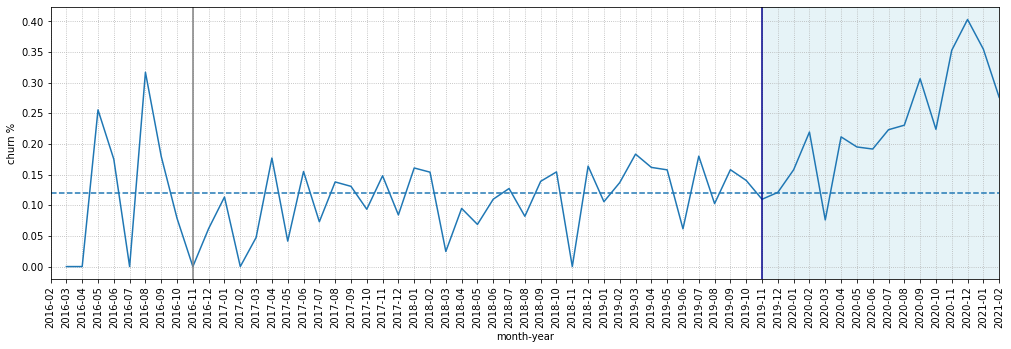

In [21]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month-year', y='churn %',
             data=churn_table)

plt.axhline(0.12, linestyle='--')


plt.axvline('2016-11', color='gray')
plt.axvline('2019-11', color='darkblue')
plt.axvspan('2019-11', '2021-02', alpha=0.3, color='lightblue')

plt.xlim('2016-02', '2021-02')
plt.xticks(rotation=90)
plt.grid(linestyle=':');

0.1204801846084846


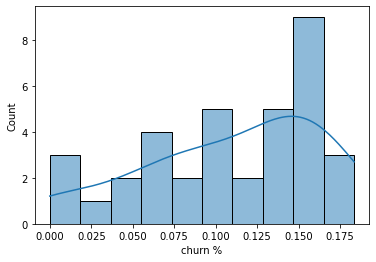

In [25]:
sns.histplot(churn_table[(churn_table['month-year'] >= '2016-11') 
                         & (churn_table['month-year'] < '2019-11')]['churn %'], bins=10,kde=True);

print(churn_table[(churn_table['month-year'] >= '2016-11') 
                  & (churn_table['month-year'] < '2019-11')]['churn %'].median())

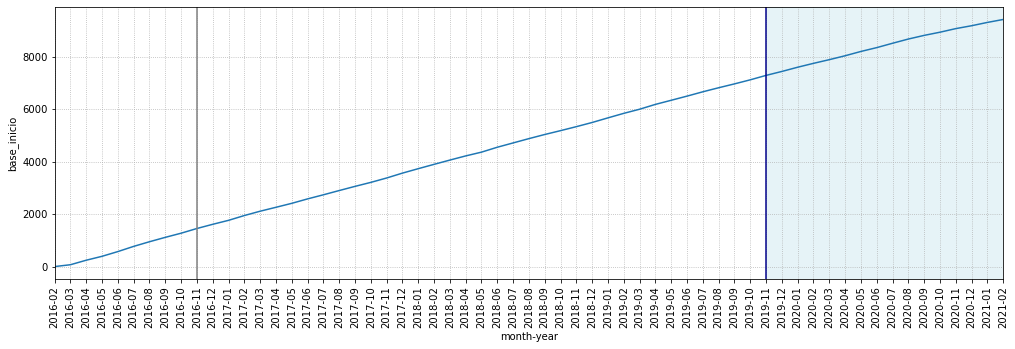

In [27]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month-year', y='base_inicio',
             data=churn_table)

plt.axvline('2016-11', color='gray')
plt.axvline('2019-11', color='darkblue')
plt.axvspan('2019-11', '2021-02', alpha=0.3, color='lightblue')

plt.xlim('2016-02', '2021-02')
plt.xticks(rotation=90)
plt.grid(linestyle=':');

## Gráfico indicativo do número de cadastros por mês ao longo do tempo

- A partir de Agosto de 2020, o número de novos cadastros permaneceu majoritariamente abaixo de 160

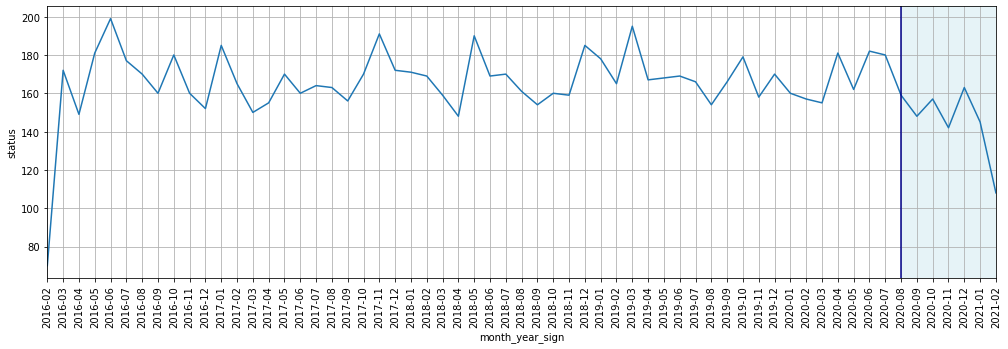

In [28]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_sign', y='status',
             data=new_df.groupby(['month_year_sign']).count().reset_index())

plt.axvline('2020-08', color='darkblue')
plt.axvspan('2020-08', '2021-02', alpha=0.3, color='lightblue')

plt.xlim('2016-02', '2021-02')
plt.xticks(rotation=90)
plt.grid();

### Observando os dados de maneira trimestral, é possivel notar que após o 2º trimestre de 2020 o número de novos cadastros vem caindo

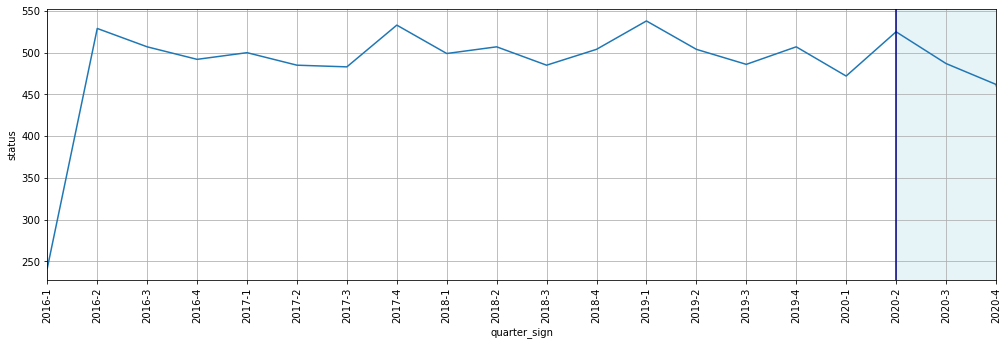

In [31]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_sign', y='status',
             data=new_df.groupby(['quarter_sign']).count().reset_index())

plt.axvline('2020-2', color='darkblue')
plt.axvspan('2020-2', '2020-5', alpha=0.3, color='lightblue')

plt.xlim('2016-1', '2020-4')
plt.xticks(rotation=90)
plt.grid();

## Gráfico indicativo do número de cadastros por mês ao longo do tempo separado por região geográfica

* Norte e Nordeste são as regiões em que mais se concentram novas assinaturas
* Relacionando com o gráfico geral de novos cadastros, é possível observar que a região Nordeste teve picos e vales extremos a partir de Agosto de 2020
* A região Sul deve o seur maior vale em Outubro de 2020, ficando abaixo de 10 cadastros pela primeira vez

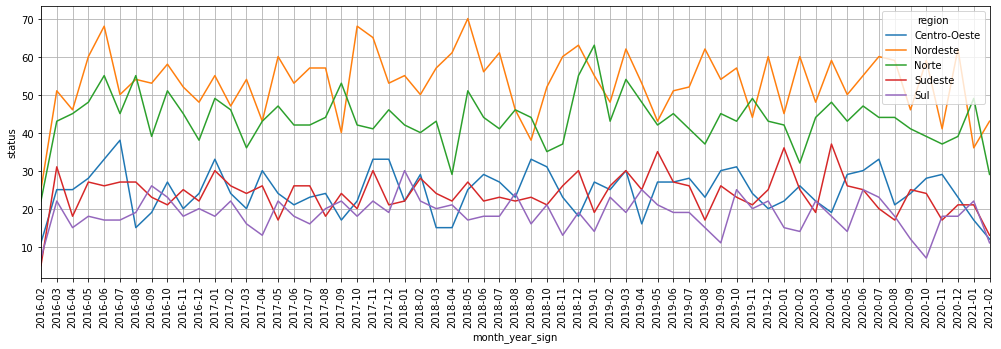

In [32]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_sign', y='status', hue='region',
             data=new_df.groupby(['month_year_sign', 'region']).count().reset_index())
plt.xlim('2016-02', '2021-02')
plt.xticks(rotation=90)
plt.grid();

### Observando os dados de maneira trimestral, é possível notar que após o 2º trimestre o número de cadastros na região Norte vem caindo, sendo o 4º trimestre aquele que registrou o menor numero de cadastros em todo o periodo observado

* A região Sul também registrou a mesma tendência de queda, com o 4º semestre de 2020 sendo o periodo com o menor número cadastros em todo o histórico
* A região Nordeste registrou que no 4º semestre de 2020 em relação ao 3º semestre do mesmo ano

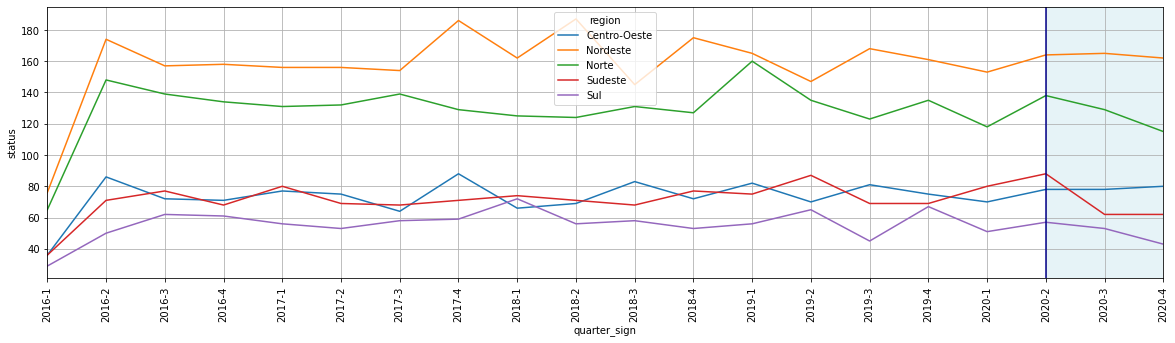

In [43]:
plt.figure(figsize=(20,5))
sns.lineplot(x='quarter_sign', y='status', hue='region',
             data=new_df.groupby(['quarter_sign', 'region']).count().reset_index())

plt.axvline('2020-2', color='darkblue')
plt.axvspan('2020-2', '2020-5', alpha=0.3, color='lightblue')

plt.xlim('2016-1', '2020-4')
plt.xticks(rotation=90)

plt.grid();

## Gráfico indicativo do número de cadastros por mês ao longo do tempo se parado por canal em que o cadastro de assinatura foi realizado

Se destacam os canais que mais convertem assinaturas:
- Organic Search
- Direct

Os demais possuem ritmo semelhante ao longo do tempo observado

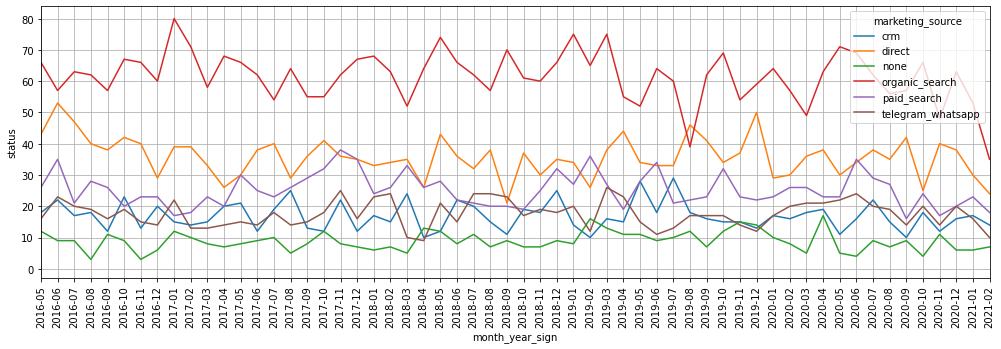

In [35]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_sign', y='status', hue='marketing_source',
             data=new_df.groupby(['month_year_sign', 'marketing_source']).count().reset_index())
plt.xlim('2016-05', '2021-02')
plt.xticks(rotation=90)
plt.grid();

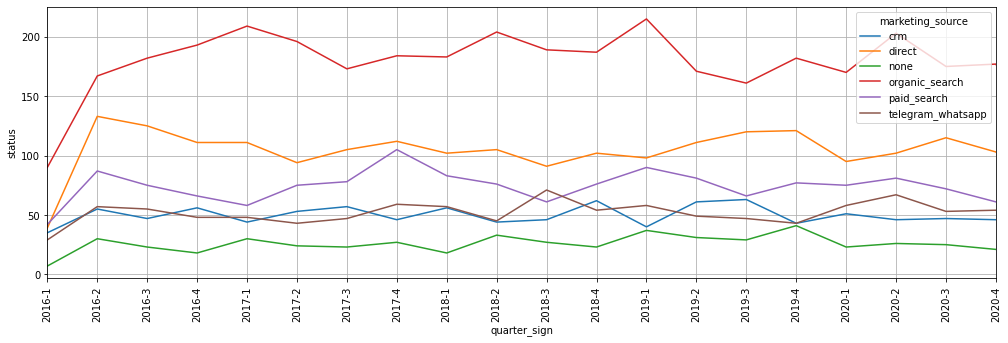

In [44]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_sign', y='status', hue='marketing_source',
             data=new_df.groupby(['quarter_sign', 'marketing_source']).count().reset_index())
plt.xlim('2016-1', '2020-4')
plt.xticks(rotation=90)
plt.grid();

## Gráfico indicativo do número de cancelamentos por mês ao longo do tempo

Apesar de o numero de novos cadastros terem se mantido constantes ao longo do tempo, seja por região ou por canal de conversão de assinatura, a partir de Agosto de 2018 o número de cancelamentos por mês teve um ligeiro aumento, com crescimento mais pronunciado a partir do período final do ano de 2019.

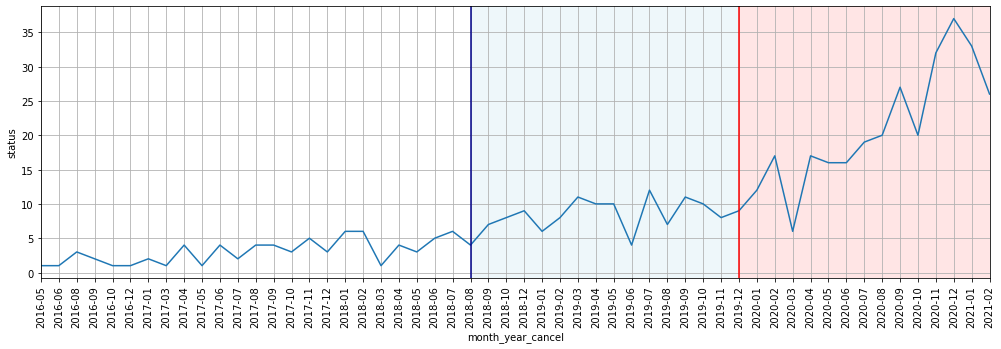

In [45]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_cancel', y='status', 
             data=new_df.groupby(['month_year_cancel']).count().reset_index())

plt.xlim('2016-05', '2021-02')
plt.xticks(rotation=90)

plt.axvline('2018-08', color='darkblue')
plt.axvline('2019-12', color='red')
plt.axvspan('2018-08', '2019-12', alpha=0.2, color='lightblue')
plt.axvspan('2019-12', '2021-02', alpha=0.1, color='red')

plt.grid();

### Analisando esses dados de maneira trimestral, é claro o crescimento do número absoluto de cancelamentos, sendo mais pronunciada a curva de crescimento a partir do 4º trimestre de 2019

Com as informações coletadas até aqui, é possível fazer algumas observações:
- Por volta do ano de 2019 algo já fazia com que os clientes cancelassem suas assinaturas com maior frequência
- Esse acontecimento teve maior impacto no ano de 2020, culminando num crescimento recorde do número de cancelamentos de mais de 80 no 4º semestre

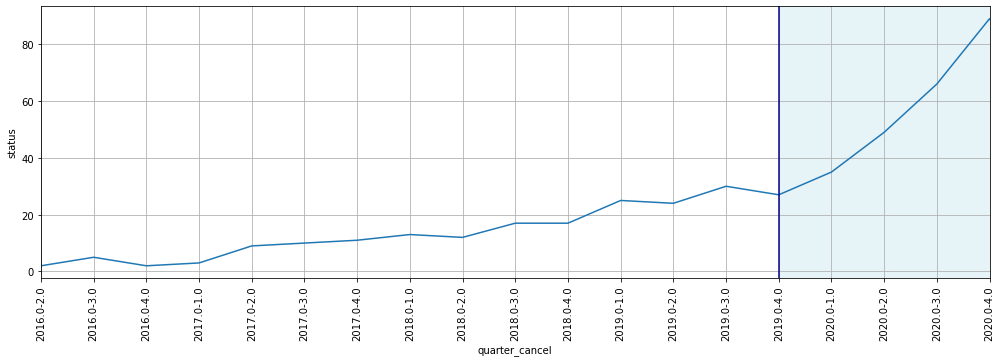

In [48]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_cancel', y='status', 
             data=new_df.groupby(['quarter_cancel']).count().reset_index())

plt.axvline('2019.0-4.0', color='darkblue')
plt.axvspan('2019.0-4.0', '2020.0-4.0', alpha=0.3, color='lightblue')

plt.xlim('2016.0-2.0', '2020.0-4.0')
plt.xticks(rotation=90)

plt.grid();

## Gráfico indicativo do número de cancelamentos por mês ao longo do tempo por região geográfica

A partir de Outubro de 2019 o número de cancelamentos por região em geral fica mais evidente, principalmente para as regiões Norte e Nordeste, essas que são as que lideram desde sempre o número de novos cadastros por mês.

É possível notar que o pico de cancelamento de ambas as regiões acontece em torno do final do ano de 2020.

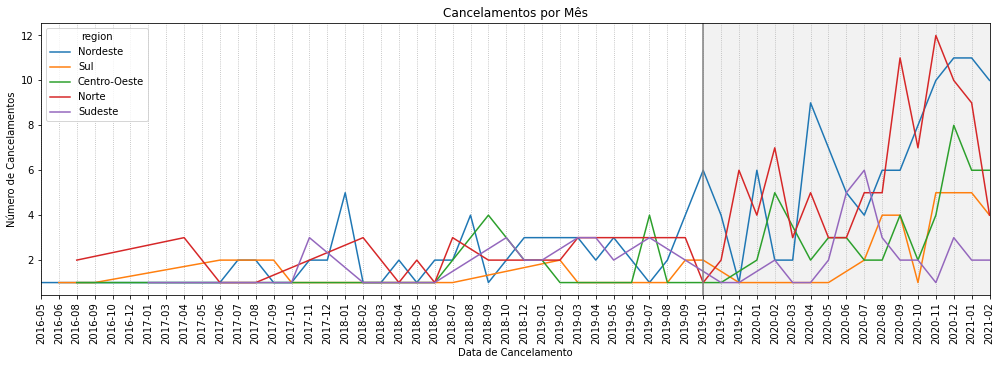

In [50]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_cancel', y='status', 
             hue='region', 
             data=new_df.groupby(['month_year_cancel', 'region']).count().reset_index())

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
plt.xlim('2016-05', '2021-02')

plt.axvline('2019-10', color='gray')
plt.axvspan('2019-10', '2021-02', alpha=0.1, color='gray')


plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':', axis='x');

### Analisando os mesmos dados, agora de maneira trimestral, é interessante observar que:

- O aumento no número de cancelamentos nas regiões Norte e Nordeste acompanham a mesma tendência do gráfico geral de cancelamentos, indicando que o comportamento das mesmas tenha grande peso na onda observada
- Da mesma forma que as regiões Norte e Nordeste se comportam de maneira similar, as regiões Centro-Oeste, Sul e Sudeste se comportam de maneira semelhante, indicando que os assinantes dessas regiões possam ter hábitos parecidos

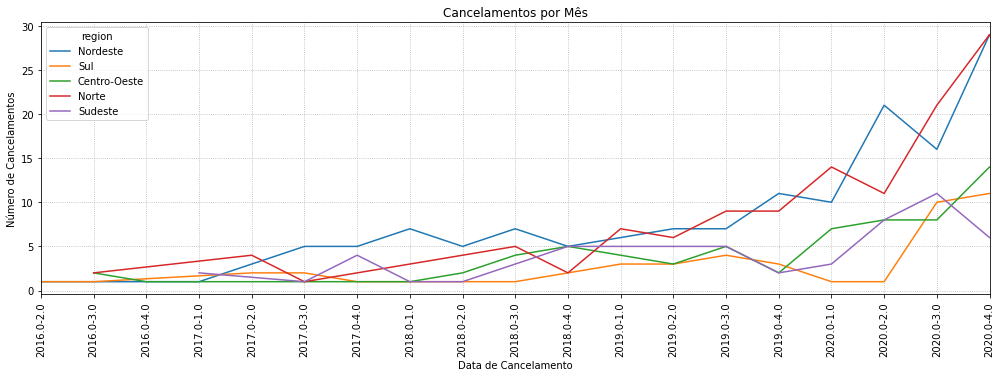

In [51]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_cancel', y='status', 
             hue='region', 
             data=new_df.groupby(['quarter_cancel', 'region']).count().reset_index())

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
plt.xlim('2016.0-2.0', '2020.0-4.0')

#plt.axvline('2019-10', color='gray')
#plt.axvspan('2019-10', '2021-02', alpha=0.1, color='gray')


plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':');

## Gráfico indicativo do número de cancelamentos por mês ao longo do tempo por região geográfica por canal em que o cadastro de assinatura foi realizado

A maior movimentação de cancelamentos acontece principalmente após Outubro de 2019, no canal de busca orgânica. O pico acontece na mesma época em que as maiores desistência de Norte e Nordeste ocorrem, final do ano de 2020. Vale salientar que o canal de Direct também é destacado nesse período.



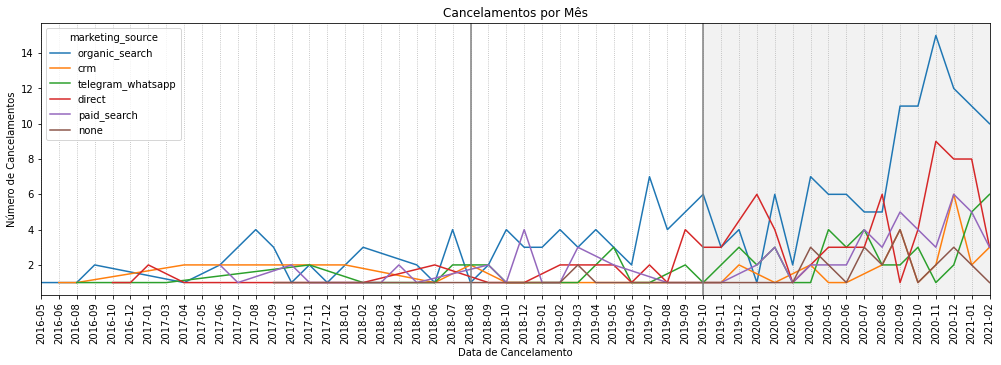

In [52]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_cancel', y='status', 
             hue='marketing_source', 
             data=new_df.groupby(['month_year_cancel', 'marketing_source']).count().reset_index())

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
plt.xlim('2016-05', '2021-02')

plt.axvline('2018-08', color='gray')
plt.axvline('2019-10', color='gray')
plt.axvspan('2019-10', '2021-02', alpha=0.1, color='gray')

plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':', axis='x');

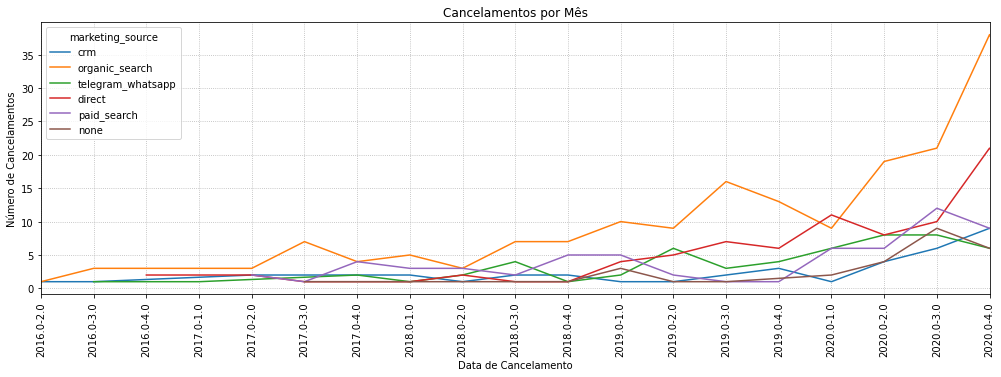

In [53]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_cancel', y='status', 
             hue='marketing_source', 
             data=new_df.groupby(['quarter_cancel', 'marketing_source']).count().reset_index())

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
plt.xlim('2016.0-2.0', '2020.0-4.0')

plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':');

## Como os assinantes das regiões Norte e Nordeste se comportam de maneira semelhante, assim como os assinantes das demais regiões, os dados foram segmentados para facilitar o entendimento dos hábitos daqueles que cancelaram sua assinatura

In [64]:
estados_n = new_df[
    ((new_df['region'] == 'Norte') |
    (new_df['region'] == 'Nordeste'))]

estados_s = new_df[
    ((new_df['region'] == 'Centro-Oeste') |
    (new_df['region'] == 'Sudeste') |
    (new_df['region'] == 'Sul'))]

## É possível observar que, daqueles que cancelaram suas assinaturas a partir de 2020, grande parte teve sua assinatura criada depois de 2019

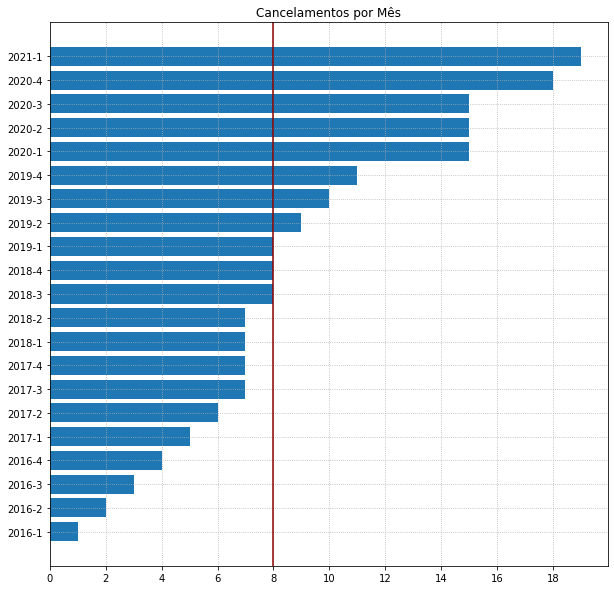

In [141]:
# Calculo para retornar quando os cancelamentos das regiões Norte e Nordeste foram cadastrados inicialmente

dados_n = estados_n[(estados_n['status']=='canceled') &
        (estados_n['month_year_cancel'] > '2019-12')].\
        groupby('quarter_sign').\
        count().reset_index()[['quarter_sign','created_at']]

plt.figure(figsize=(10,10))
plt.barh(dados_n.quarter_sign, dados_n.created_at.sort_values())
plt.axvline(8, color='darkred')
plt.xticks(np.arange(0, 20, step=2))

plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':');

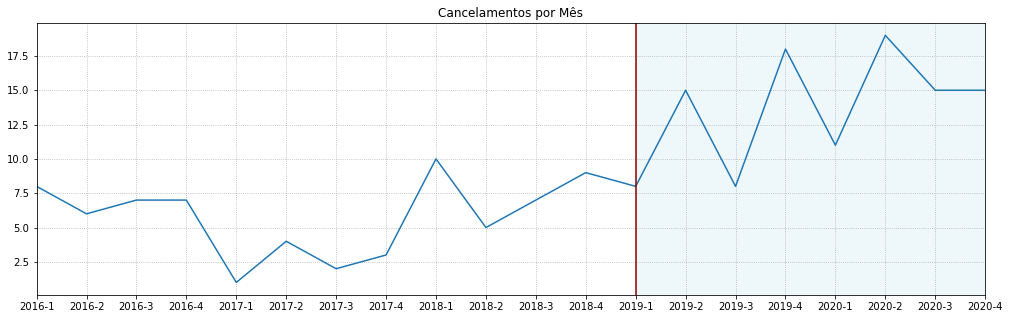

In [142]:
dados_n = estados_n[(estados_n['status']=='canceled') &
        (estados_n['month_year_cancel'] > '2019-12')].\
        groupby('quarter_sign').\
        count().reset_index()[['quarter_sign','created_at']]

plt.figure(figsize=(17,5))
plt.plot(dados_n.quarter_sign, dados_n.created_at)

plt.xlim('2016-1', '2020-4')
plt.axvline('2019-1', linestyle='-', color='darkred')
plt.axvspan('2019-1', '2020-4', alpha=0.2,color='lightblue')

plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':');

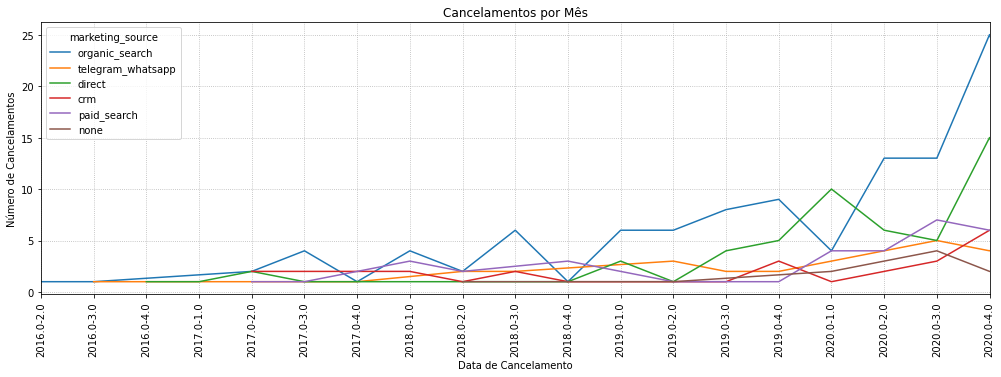

In [143]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_cancel', y='status', 
             hue='marketing_source', 
             data=estados_n.groupby(['quarter_cancel', 'marketing_source']).count().reset_index())

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
plt.xlim('2016.0-2.0', '2020.0-4.0')

plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':');

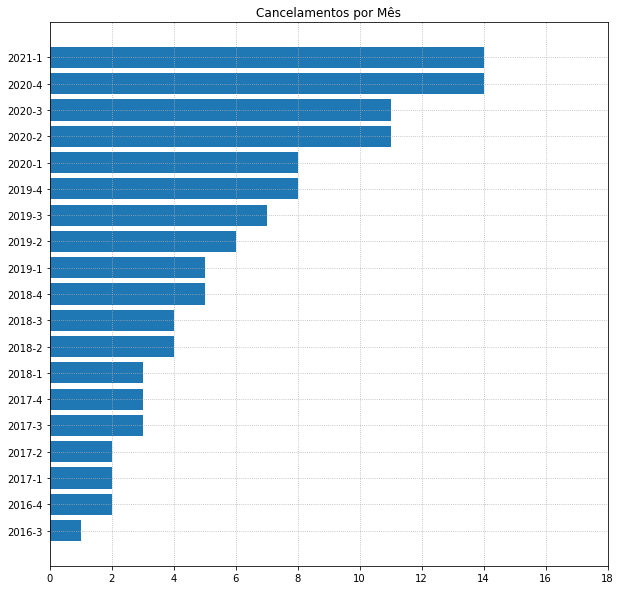

In [139]:
# Calculo para retornar quando os cancelamentos das regiões restantes foram cadastrados inicialmente

dados_s = estados_s[(estados_s['status']=='canceled') &
        (estados_s['month_year_cancel'] > '2019-12')].\
        groupby('quarter_sign').\
        count().reset_index()[['quarter_sign','created_at']]

plt.figure(figsize=(10,10))
plt.barh(dados_s.quarter_sign, dados_s.created_at.sort_values())
plt.xticks(np.arange(0, 20, step=2))

plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':');

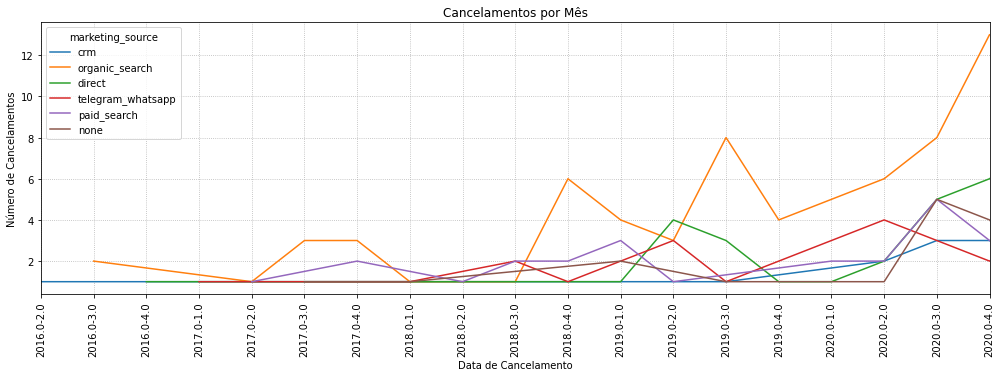

In [144]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_cancel', y='status', 
             hue='marketing_source', 
             data=estados_s.groupby(['quarter_cancel', 'marketing_source']).count().reset_index())

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
plt.xlim('2016.0-2.0', '2020.0-4.0')

plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':');

# Daqui pra baixo n tem nada, só teste que eu fui acumulando

In [ ]:
apos= new_df[new_df['month_year_cancel'] >= '2019-10']
antes = new_df[new_df['month_year_cancel'] < '2019-10']

In [ ]:
antes_N = antes[(antes['region'] == 'Nordeste') | (antes['region'] == 'Norte')]
apos_N = apos[(apos['region'] == 'Nordeste') | (apos['region'] == 'Norte')]

In [ ]:
antes[(antes['region'] == 'Nordeste') | (antes['region'] == 'Norte')].describe()

In [ ]:
apos[(apos['region'] == 'Nordeste') | (apos['region'] == 'Norte')].describe()

In [ ]:
N = new_df[
    ((new_df['region'] == 'Norte') |
    (new_df['region'] == 'Nordeste')) &
    (new_df['status'] == 'canceled')
]

In [ ]:
N[(N['month_year_cancel'] >= '2019-10')]['state'].value_counts().sum()

In [ ]:
(N[(N['month_year_cancel'] >= '2019-10')].groupby('month_year_cancel')['state'].value_counts()/
 N[(N['month_year_cancel'] >= '2019-10')].groupby('month_year_cancel')['state'].value_counts().sum())*100

In [ ]:
N[(N['month_year_cancel'] >= '2019-10')].describe(include=['object', 'int', 'float'])

In [ ]:
N.groupby(['state', 'month_year_cancel']).count().reset_index()

In [ ]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_cancel', y='status', 
             hue='state', 
             data=N[(N['state'] == 'SE') | 
                    (N['state'] == 'PA') | 
                    (N['state'] == 'MA') |
                    (N['state'] == 'RR')].groupby(['month_year_cancel', 'state']).count().reset_index(), 
             palette='gist_ncar')

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)

plt.ylim(0,5)
plt.xlim('2019-10', '2021-02')
"""
plt.axvline('2019-10', color='gray')
plt.axvspan('2019-10', '2021-02', alpha=0.1, color='gray')"""


plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':', axis='both');

# MA, TO, PA

In [ ]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_cancel', y='status', 
             hue='state', 
             data=N.groupby(['quarter_cancel', 'state']).count().reset_index(), palette='gist_ncar')

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
"""plt.xlim('2019-10', '2021-02')

plt.axvline('2019-10', color='gray')
plt.axvspan('2019-10', '2021-02', alpha=0.1, color='gray')"""


plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':', axis='x');

# MA, TO, PA

In [ ]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_cancel', y='status', 
             hue='marketing_source', 
             data=N.groupby(['quarter_cancel', 'marketing_source']).count().reset_index())

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
#plt.xlim('2016.0-4.0', '2021.0-1.0')

plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':');

In [ ]:
new_df[((new_df['state'] == 'MA') |
       (new_df['state'] == 'TO') |
       (new_df['state'] == 'PA')) &
       (new_df['status'] == 'canceled')&
       (new_df['month_year_cancel'] >= '2019-10')].describe()

In [ ]:
new_df[((new_df['state'] == 'MA') |
       (new_df['state'] == 'TO') |
       (new_df['state'] == 'PA')) &
       (new_df['status'] == 'canceled')&
       (new_df['month_year_cancel'] >= '2019-10')].describe(include=['object', 'int', 'float'])

In [ ]:
new_df[((new_df['state'] == 'MA') |
       (new_df['state'] == 'TO') |
       (new_df['state'] == 'PA')) &
       (new_df['status'] == 'canceled')&
       (new_df['month_year_cancel'] < '2019-10')].describe(include=['object', 'int', 'float'])

In [ ]:
plt.figure(figsize=(9,6))
sns.heatmap(antes_N[antes_N['status'] == 'canceled'].corr(), annot=True);

In [ ]:
plt.figure(figsize=(9,6))
sns.heatmap(apos_N[apos_N['status'] == 'canceled'].corr(), annot=True);

In [ ]:
new_df[
    ((new_df['state'] == 'MA') |
    (new_df['state'] == 'TO') |
    (new_df['state'] == 'PA')) &
    (new_df['status'] == 'canceled')&
    (new_df['month_year_cancel'] >= '2019-10')].count()/ new_df[
    (new_df['status'] == 'canceled')&
    (new_df['month_year_cancel'] >= '2019-10')].count()

In [ ]:
## Antes

antes_1019[antes_1019['status'] == 'canceled']['region'].value_counts()

In [ ]:
## Antes

antes_1019[antes_1019['status'] == 'canceled']['marketing_source'].value_counts()

In [ ]:
## Após

pos_1019[pos_1019['status'] == 'canceled']['region'].value_counts()

In [ ]:
## Após

pos_1019[pos_1019['status'] == 'canceled']['marketing_source'].value_counts()

In [ ]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_sign', y='status',
             data=antes_1019.groupby(['month_year_sign']).count().reset_index())
plt.xlim('2016-05', '2019-10')
plt.xticks(rotation=90)
plt.grid();

In [ ]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_sign', y='status',
             data=pos_1019.groupby(['month_year_sign']).count().reset_index())
plt.xlim('2016-05', '2019-10')
plt.xticks(rotation=90)
plt.grid();

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(antes_1019.corr(), annot=True);

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(pos_1019.corr(), annot=True);

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 6))

ax[0].hist(x=antes_1019['client_time'], bins=20)
ax[0].set_title('Antes 10/2019')
ax[0].grid()
ax[0].set_ylim(0,70)
ax[0].set_xlim(0,1800)

ax[1].hist(x=pos_1019['client_time'], bins=20)
ax[1].set_title('Pós 10/2019')
ax[1].grid()
ax[1].set_ylim(0,70)
ax[0].set_xlim(0,1800);

In [ ]:
pd.pivot_table(new_df,index="month_year_last_purchase", 
                            columns="status",
                            aggfunc="count",
                            values='all_orders',
                            fill_value=0)

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

data = [antes_1019['client_time'], pos_1019['client_time']]

positions = [1, 2] # posição de cada boxplot no eixo x

ax.boxplot(data, positions=positions)

ax.set_xticks(positions)
ax.set_xticklabels(['Antes 10/2019', 'Pós 10/2019'])
ax.set_title('Boxplots Antes e Pós 10/2019')
ax.grid(True)

plt.show()

In [ ]:
plt.figure(figsize=(13,7))
sns.boxplot(x='client_time', y='marketing_source', data=antes_1019)
plt.grid()

In [ ]:
plt.figure(figsize=(13,7))
sns.boxplot(x='client_time', y='marketing_source', data=pos_1019)
plt.grid()

In [ ]:
new_df.to_csv('teste.csv')

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='revenue/orders', y='status', data=new_df)
plt.grid();

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(new_df['time_lastbuy'], color='purple')
plt.grid();

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(new_df['recency'].where(new_df['status'] == 'paused'), color='magenta')
plt.grid();

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(new_df['client_cancel_age'], color='orange')
plt.grid();

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='items_quantity', y='status', data=new_df)
plt.grid();

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='all_orders', y='status', data=new_df)
plt.grid();

In [ ]:
new_df.describe()

In [ ]:
new_df['status'].value_counts()

In [ ]:
pausado = new_df[new_df['status'] == 'paused']
ativo = new_df[new_df['status'] == 'active']
cancelado = new_df[new_df['status'] == 'canceled'] 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(12,8))

sns.heatmap(cancelado.corr(), annot=True)

In [ ]:
new_df.head()

In [ ]:
df_ml = new_df.copy()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

df_ml.drop(['created_at', 'deleted_at', 'birth_date', 
            'version', 'city', 'state', 'neighborhood',
           'last_date_purchase', 'average_ticket', 
            'time_lastbuy', 'client_cancel_age', 'revenue/orders'], axis=1, inplace=True)

df_ml = df_ml[df_ml['status'] != 'paused']

df_ml['status'] = df_ml['status'].map({'active': 0,
                                       'canceled': 1})

X = df_ml.drop('status', axis=1)
X = pd.get_dummies(X)
y = df_ml['status']

In [ ]:
X.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X)
X_pca = pca.transform(X)

In [ ]:
X_pca.shape

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, stratify=y, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

In [ ]:
logreg.score(X_test, y_test)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn import metrics

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
skf = StratifiedKFold(5)

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

grid_log = GridSearchCV(logreg, cv=skf, verbose=2, param_grid=param_grid,scoring = 'recall')
grid_log.fit(X_train, y_train)
grid_log.best_score_

In [ ]:
y_pred_2 = grid_log.predict(X_test)

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_2), annot=True)

In [ ]:
model = grid_log.best_estimator_

In [ ]:
pd.DataFrame(model.coef_)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
y_pred_etc = etc.predict(X_test)

metrics.recall_score(y_test, y_pred_etc)

In [ ]:
metrics.confusion_matrix(y_test, y_pred_2)

In [ ]:
pd.DataFrame(etc.feature_importances_).sort_values(0, ascending=False)

In [ ]:
from sklearn.metrics import 